In [60]:
# Data manipulation & visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Load Data

In [61]:
data_file='model_comparison.csv'

In [62]:
# Import the Diabetes dataset:
comparison_df = pd.read_csv(data_file) 

## 2. Check and Visualise the Data

In [63]:
comparison_df

,Model,Accuracy,AUC,Average Precision,Precision,Recall,F1-score,Runtime (ms)
0,LR Base,0.851,0.802,0.412,0.547,0.154,0.241,187.33
1,NB Base,0.785,0.780,0.367,0.353,0.485,0.409,108.96
2,DT Base,0.798,0.597,0.216,0.322,0.290,0.305,605.42
3,RF Base,0.833,0.750,0.333,0.418,0.225,0.292,14378.17
4,LR Optimised,0.716,0.802,0.410,0.318,0.745,0.446,1830.36
5,NB Optimised,0.737,0.782,0.368,0.321,0.649,0.430,1399.47
6,DT Optimised,0.729,0.782,0.370,0.319,0.682,0.435,1347.81
7,RF Optimised,0.742,0.802,0.412,0.335,0.696,0.452,42067.51


In [64]:
comparison_df.shape

(8, 8)

In [65]:
comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              8 non-null      object 
 1   Accuracy           8 non-null      float64
 2   AUC                8 non-null      float64
 3   Average Precision  8 non-null      float64
 4   Precision          8 non-null      float64
 5   Recall             8 non-null      float64
 6   F1-score           8 non-null      float64
 7   Runtime (ms)       8 non-null      float64
dtypes: float64(7), object(1)
memory usage: 644.0+ bytes


In [66]:
comparison_df.shape

(8, 8)

In [67]:
comparison_df.set_index('Model', inplace=True)

In [68]:
# Convert columns from object to numeric
comparison_df = comparison_df.apply(pd.to_numeric, errors='coerce')

In [69]:
#  Radar chart for the optimised models
def radar_chart(df, models):
    metrics = ['Accuracy', 'AUC', 'Average Precision','Precision', 'Recall', 'F1-score']
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
    for model in models:
        values = df.loc[model, metrics].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_ylim(0, 1)
    
    # Increase the font size of metric labels
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    plt.title('Radar Chart of Optimised Models', fontsize=14)
    plt.tight_layout()
    plt.show()


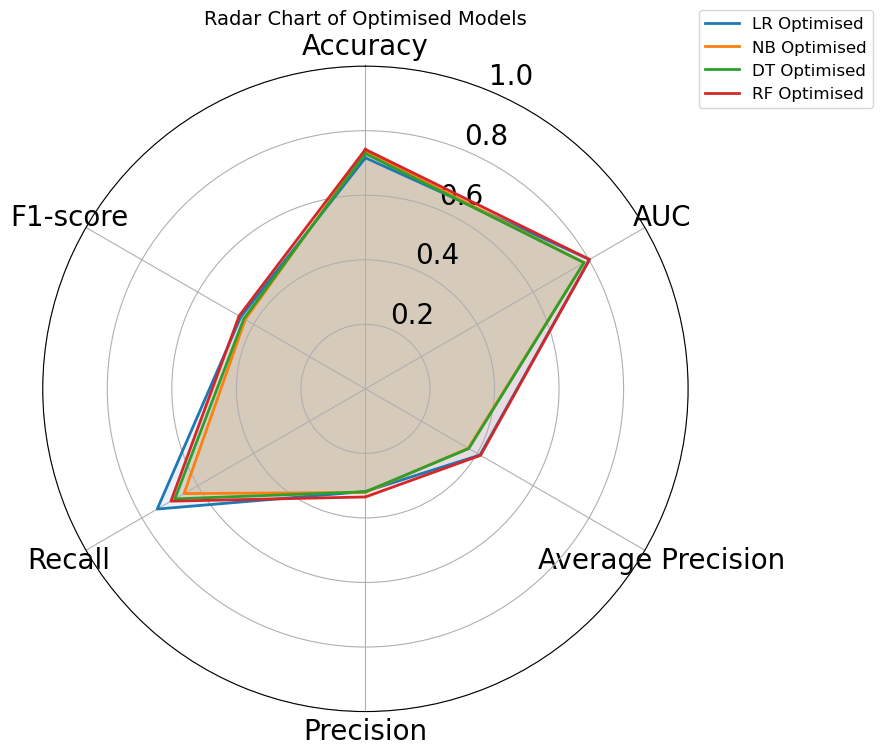

In [70]:
radar_chart(comparison_df, comparison_df.index[comparison_df.index.str.contains('Optimised')])

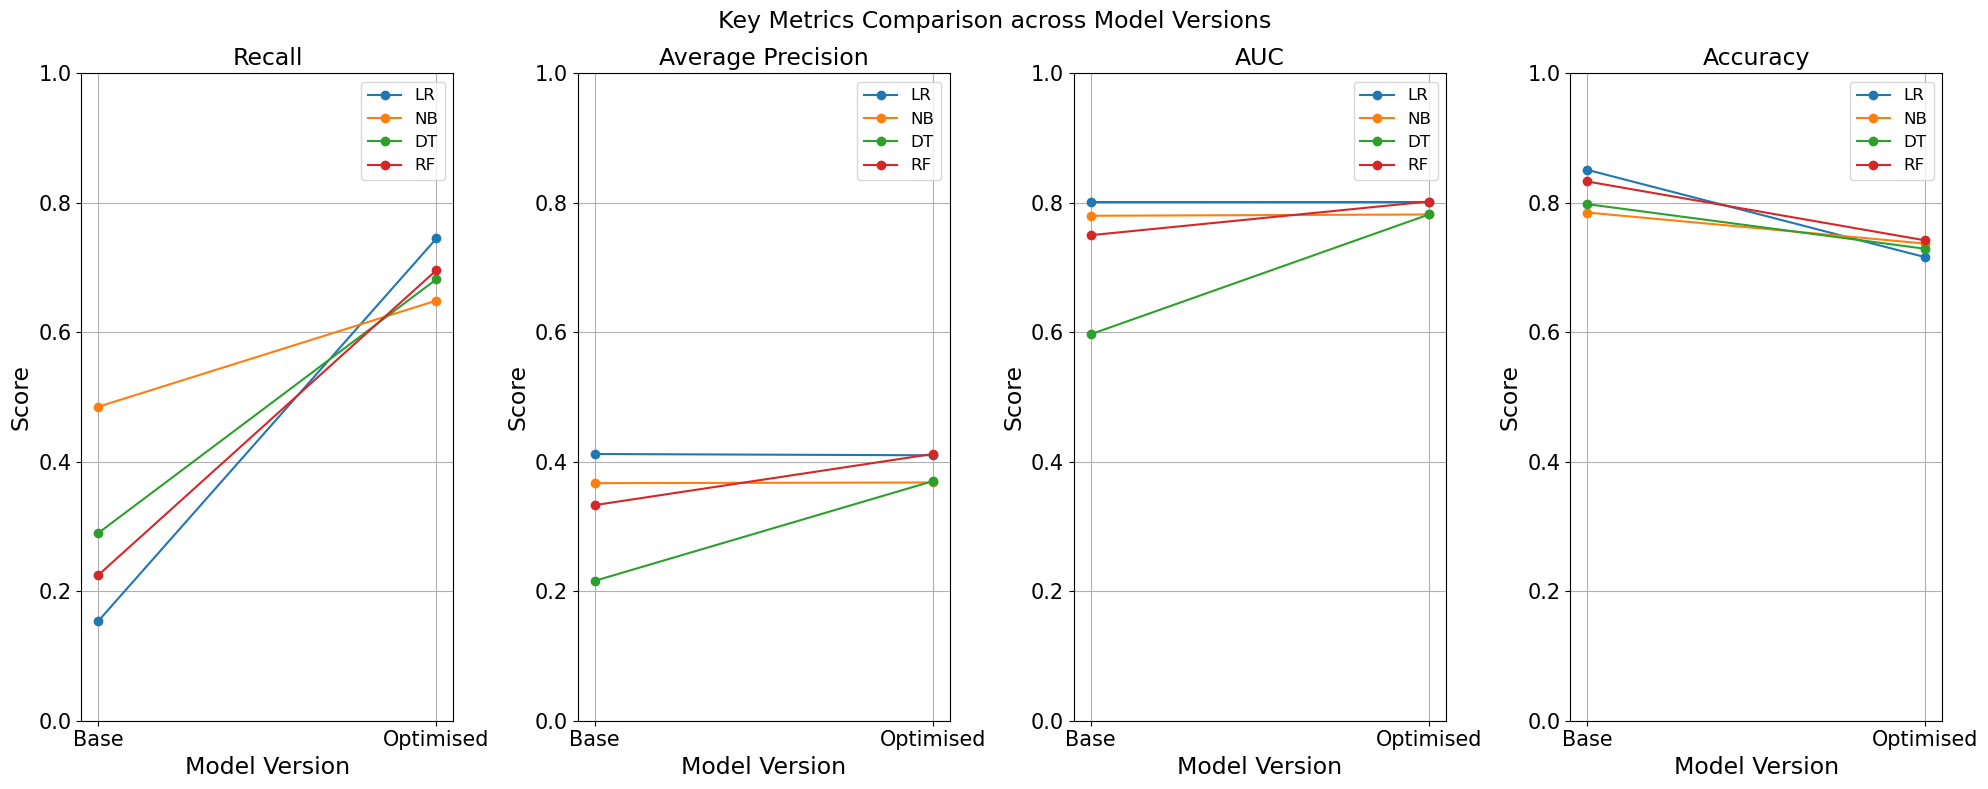

In [71]:
# Line plots comparing key metrics across model versions
key_metrics = ['Recall', 'Average Precision', 'AUC', 'Accuracy']
model_prefix = ['LR', 'NB', 'DT', 'RF']

fig, axes = plt.subplots(1, len(key_metrics), figsize=(20, 8))
fig.suptitle('Key Metrics Comparison across Model Versions', fontsize=17)

for i, metric in enumerate(key_metrics):
    ax = axes[i]
    
    for model in model_prefix:
        base = comparison_df.loc[f'{model} Base', metric]
        smote_hyper = comparison_df.loc[f'{model} Optimised', metric]
        ax.plot(['Base', 'Optimised'], [base, smote_hyper], marker='o', label=model)
            
    ax.set_xlabel('Model Version', fontsize=17)
    ax.set_ylabel('Score', fontsize=17)
    ax.set_title(metric, fontsize=17)
    ax.set_ylim(bottom=0, top=1)
    ax.legend(fontsize=12)
    ax.grid(True)
    
    # Increase font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()


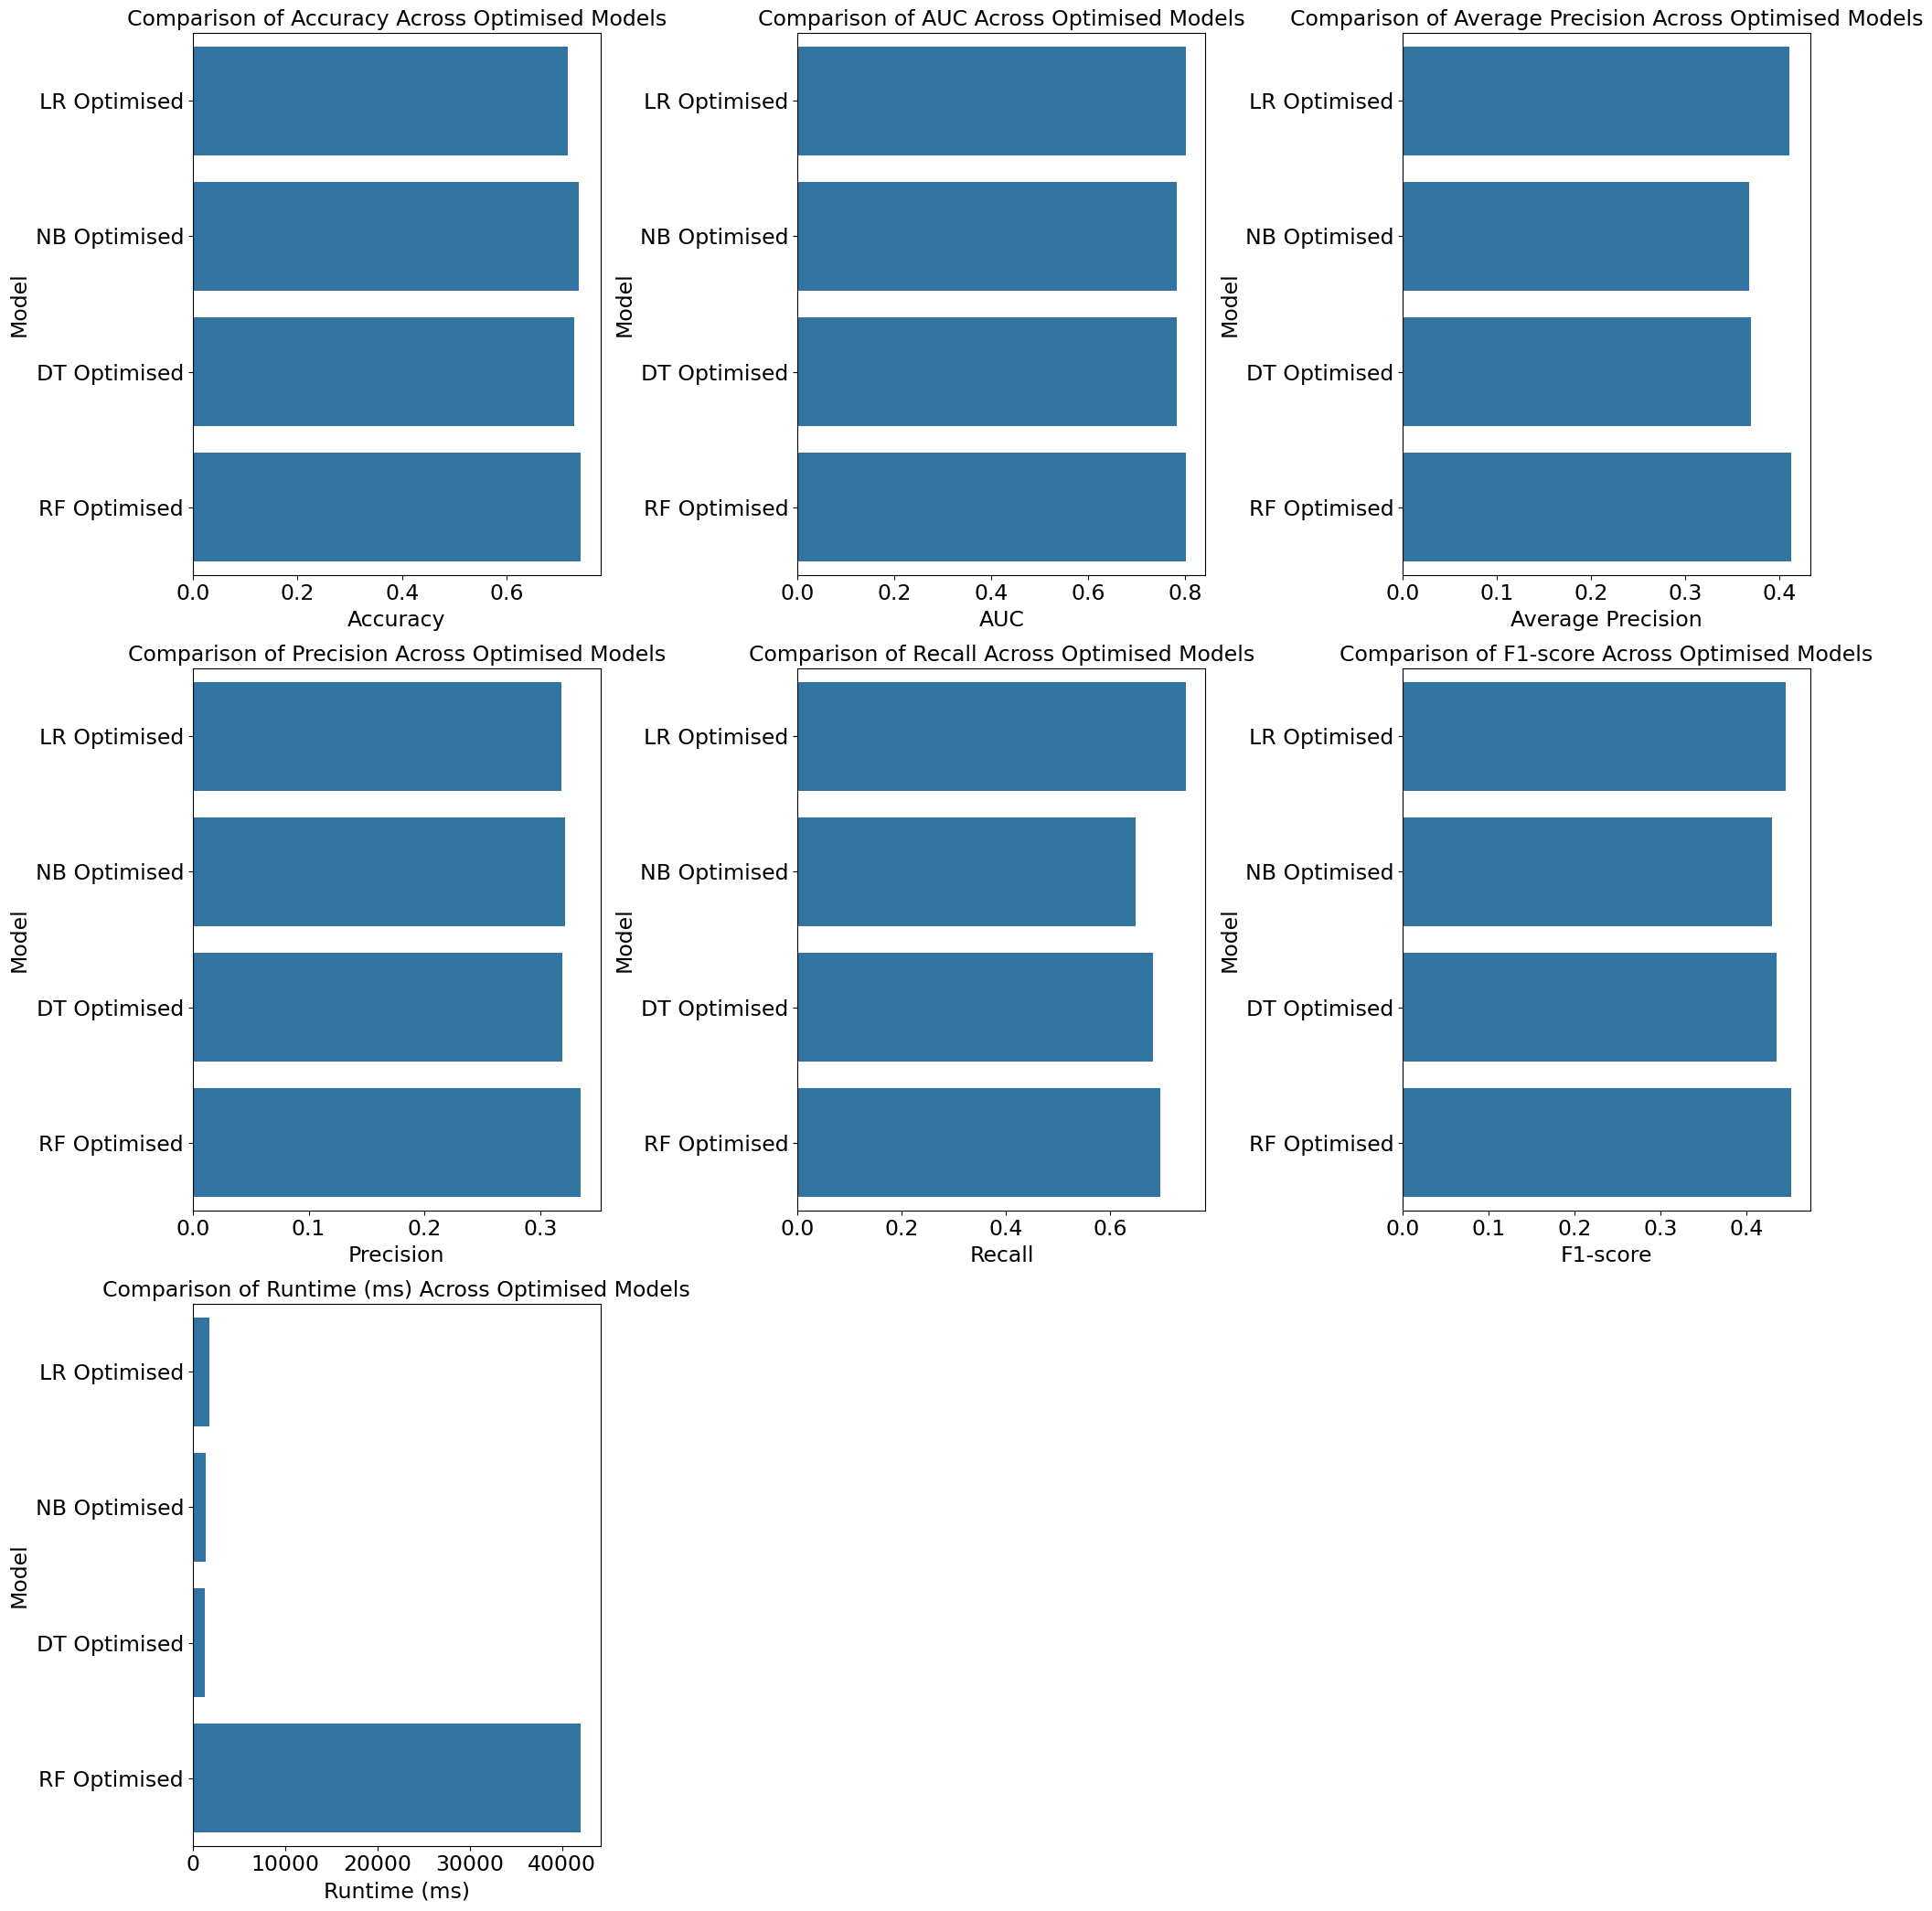

In [73]:
# Bar plots for each metric and optimised model
metrics = ['Accuracy', 'AUC', 'Average Precision', 'Precision', 'Recall', 'F1-score', 'Runtime (ms)']

# Filter the dataframe to include only optimised models
optimised_df = comparison_df[comparison_df.index.str.contains('Optimised')]

# Calculate the number of rows and columns
n_cols = 3  
n_rows = len(metrics) // n_cols + 1

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7*n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the metrics and create a barplot for each one
for i, metric in enumerate(metrics):  
    sns.barplot(x=metric, y='Model', data=optimised_df, ax=axes[i])
    axes[i].set_title(f'Comparison of {metric} Across Optimised Models', fontsize=17)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=17)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=17)
    axes[i].tick_params(axis='both', which='major', labelsize=17)
    
# Hide any remaining empty subplots (if there are more subplots than metrics)
for ax in axes[len(metrics):]:
    ax.set_visible(False)
    
# Adjust the layout
plt.tight_layout()
plt.show()

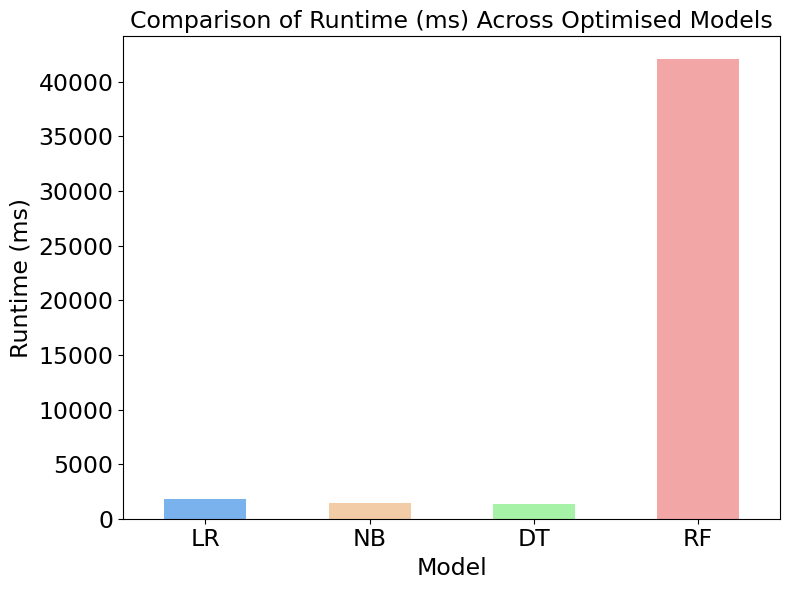

In [79]:
# Create a copy of the dataframe and modify the index
plot_df = optimised_df.copy()
plot_df.index = plot_df.index.str.replace(' Optimised', '')

# Define a color palette for different models
color_palette = {'LR': '#66B2FF', 'NB': '#FFCC99', 'DT': '#99FF99', 'RF':  '#FF9999'}

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=plot_df.index, y='Runtime (ms)', data=plot_df, palette=color_palette, width=0.5)

# Set the title
plt.title('Comparison of Runtime (ms) Across Optimised Models', fontsize=17)

# Increase label size
plt.xlabel('Model', fontsize=17)
plt.ylabel('Runtime (ms)', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show the plot
plt.tight_layout()
plt.show()


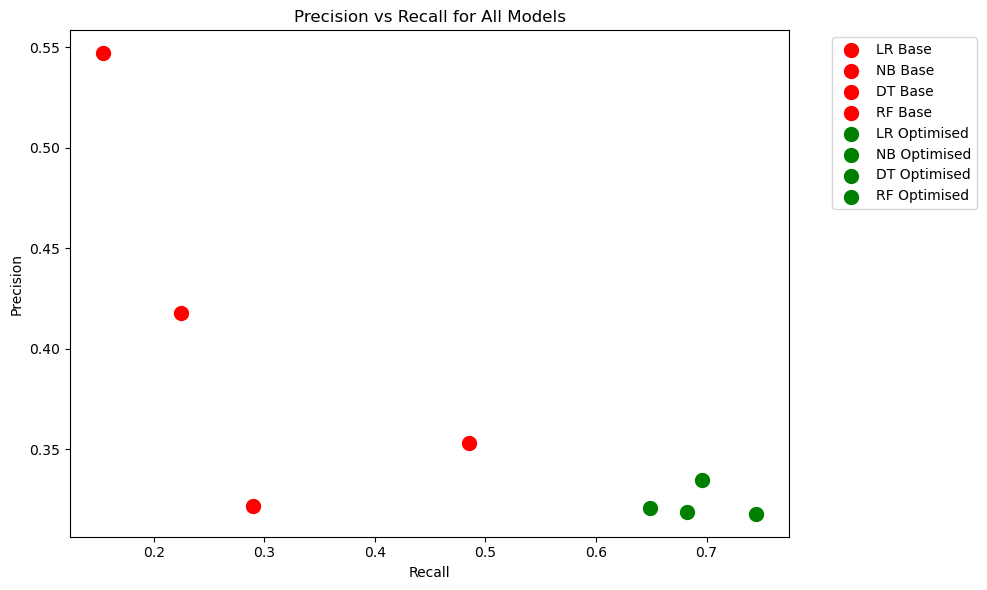

In [75]:
# Scatter plot of Precision vs Recall
plt.figure(figsize=(10, 6))
colors = {'Base': 'red', 'Optimised': 'green'}
for model in comparison_df.index:
    model_type = model.split()[-1]
    plt.scatter(comparison_df.loc[model, 'Recall'], comparison_df.loc[model, 'Precision'], 
                label=model, c=colors[model_type], s=100)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall for All Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Conclusion: Selecting the Best Model

1. **Best Overall Model:**
   - The **Random Forest Optimised** model stands out with the best combination of metrics:
     - **Accuracy:** 0.742
     - **AUC:** 0.802
     - **Recall:** 0.696
     - **F1-Score:** 0.452
   - This makes it a strong candidate for overall performance, particularly in a screening context where balancing different metrics is essential.

2. **Best Model for Recall and Runtime:**
   - **Logistic Regression Optimised** excels in recall (0.745), which is higher than any other model, and has a reasonably fast runtime (1830.36 ms). This makes it the best choice if recall and speed are the priorities, especially in real-time or resource-constrained environments.

3. **Considerations for Practical Implementation:**
   - If the goal is to minimise missed positive cases (high recall) while also considering processing time, **Logistic Regression Optimised** is likely the best option.
   - For a more balanced approach with strong overall performance across multiple metrics, **Random Forest Optimised** would be preferable, despite its longer runtime.

Overall, while **Random Forest Optimised** may offer the best comprehensive performance, **Logistic Regression Optimised** provides an excellent balance of high recall and efficiency, making it a strong contender depending on the specific needs of the deployment environment.